In [45]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import scipy.sparse
from ipywidgets import interact, widgets

In [2]:
# TODO
# Z va reso D dimensionale 
# Calcolare la norma del gradiente come norma delle somme
# 1.2 Per i dataset usare delle curve (cerchio, ellisse, etc)
# 1.3 Utilizzare gli stessi dataset 

In [3]:
# Numpy version >=1.17.3 and <1.25.0 is required for this version of SciPy

# Task 1.1

In [4]:
np.random.seed(0)
NN = 10

In [44]:
graph_type = {'cycle': nx.cycle_graph(NN), 
              'star': nx.star_graph(NN - 1), 
              'wheel': nx.wheel_graph(NN), 
              'complete': nx.complete_graph(NN),
              'path': nx.path_graph(NN)
              }

In [ ]:
def quadratic_fn(z, q, r):
    #return 0.5 * q * z * z + r * z, q * z + r
    # returns the value of the quadratic function and its gradients
    return 0.5 * z[0] * z[0] * q + z[1] * z[1] * q + z[0] * z[1] * q + z[0] * r + z[1] * r, z[0] * q + z[1] * q + r, 2*z[1]*q + z[1]*q + r

Q = np.random.uniform(size=(NN))
R = np.random.uniform(size=(NN))

In [ ]:
@interact
def gradient_tracking(graph_type):

    # Init Adjacency matrix and Identity matrix
    Adj = nx.adjacency_matrix(graph_type).toarray()
    I_NN = np.eye(NN)

    # visualize the graph
    plt.figure()
    nx.draw(graph_type, with_labels=True)
    plt.show()

    # Init weights matrix
    AA = np.zeros(shape=(NN, NN))
    for ii in range(NN):
        N_ii = np.nonzero(Adj[ii])[0]
        deg_ii = len(N_ii)
        for jj in N_ii:
            deg_jj = len(np.nonzero(Adj[jj])[0])
            AA[ii, jj] = 1 / (1 + max([deg_ii, deg_jj]))

    AA += I_NN - np.diag(np.sum(AA, axis=0))

    if 0:
        print(np.sum(AA, axis=0))
        print(np.sum(AA, axis=1))
    
    # Init variables for the optimization
    MAXITERS = 1000
    dd = 2

    # ZZ is D-dimensional
    ZZ_gt = np.zeros((MAXITERS, NN, dd))
    # SS is D-dimensional
    SS_gt = np.zeros((MAXITERS, NN, dd))
    for ii in range(NN):
        _ , SS_gt[0, ii, :-1], SS_gt[0, ii, -1] = quadratic_fn(ZZ_gt[0, ii], Q[ii], R[ii])

    cost_gt = np.zeros((MAXITERS))
    gradients_norm = np.zeros((MAXITERS, dd))
    alpha = 1e-2
    grad_ell_ii_new = np.zeros((dd))
    grad_ell_ii_old = np.zeros((dd))

    for kk in range(MAXITERS - 1):

        # gradient tracking
        for ii in range(NN):
            N_ii = np.nonzero(Adj[ii])[0]

            ZZ_gt[kk + 1, ii] += AA[ii, ii] * ZZ_gt[kk, ii]
            SS_gt[kk + 1, ii] += AA[ii, ii] * SS_gt[kk, ii]
            for jj in N_ii:
                ZZ_gt[kk + 1, ii] += AA[ii, jj] * ZZ_gt[kk, jj]
                SS_gt[kk + 1, ii] += AA[ii, jj] * SS_gt[kk, jj]

            ZZ_gt[kk + 1, ii] -= alpha * SS_gt[kk, ii]

            # print(Q[ii])
            _, grad_ell_ii_new[:-1], grad_ell_ii_new[-1] = quadratic_fn(ZZ_gt[kk + 1, ii], Q[ii], R[ii])
            _, grad_ell_ii_old[:-1], grad_ell_ii_old[-1] = quadratic_fn(ZZ_gt[kk, ii], Q[ii], R[ii])
            SS_gt[kk + 1, ii] += grad_ell_ii_new - grad_ell_ii_old

            gradients_norm[kk, :-1] = grad_ell_ii_new[:-1] - grad_ell_ii_old[:-1]
            gradients_norm[kk, -1] = grad_ell_ii_new[-1] - grad_ell_ii_old[-1]

            ell_ii_gt, _, _= quadratic_fn(ZZ_gt[kk, ii], Q[ii], R[ii])
            cost_gt[kk] += ell_ii_gt
    

In [5]:
#G = nx.path_graph(NN)
#G = nx.star_graph(NN-1)
G = nx.cycle_graph(NN)

I_NN = np.eye(NN)

Adj = nx.adjacency_matrix(G)
Adj = Adj.toarray()

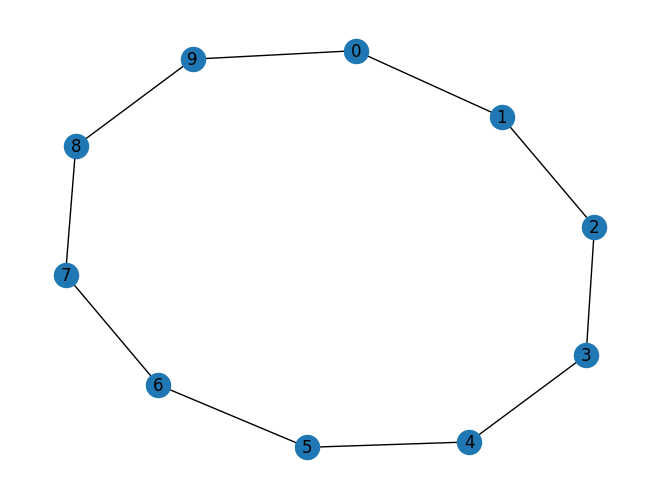

Adjacency matrix:
[[0 1 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 1 0]]
Identity matrix:
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [6]:
# Visualizing the graph
plt.figure()
nx.draw(G, with_labels=True)
plt.show()

# Showing the adjacency matrix and identity matrix  
print("Adjacency matrix:")
print(Adj)
print("Identity matrix:")
print(I_NN)

In [33]:
AA = np.zeros(shape=(NN, NN))

for ii in range(NN):
    N_ii = np.nonzero(Adj[ii])[0]
    deg_ii = len(N_ii)
    for jj in N_ii:
        deg_jj = len(np.nonzero(Adj[jj])[0])
        AA[ii, jj] = 1 / (1 + max([deg_ii, deg_jj]))

AA += I_NN - np.diag(np.sum(AA, axis=0))

if 0:
    print(np.sum(AA, axis=0))
    print(np.sum(AA, axis=1))

In [34]:
print("Matrix A:")
print(AA)

Matrix A:
[[0.33333333 0.33333333 0.         0.         0.         0.
  0.         0.         0.         0.33333333]
 [0.33333333 0.33333333 0.33333333 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.33333333 0.33333333 0.33333333 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.33333333 0.33333333 0.33333333 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.33333333 0.33333333 0.33333333
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.33333333 0.33333333
  0.33333333 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.33333333
  0.33333333 0.33333333 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.33333333 0.33333333 0.33333333]
 [0

In [35]:
def quadratic_fn(z, q, r):
    #return 0.5 * q * z * z + r * z, q * z + r
    # returns the value of the quadratic function and its gradients
    return 0.5 * z[0] * z[0] * q + z[1] * z[1] * q + z[0] * z[1] * q + z[0] * r + z[1] * r, z[0] * q + z[1] * q + r, 2*z[1]*q + z[1]*q + r

Q = np.random.uniform(size=(NN))
R = np.random.uniform(size=(NN))
print("Q:")
print(Q)
print("R:")
print(R)

Q:
[0.3595079  0.43703195 0.6976312  0.06022547 0.66676672 0.67063787
 0.21038256 0.1289263  0.31542835 0.36371077]
R:
[0.57019677 0.43860151 0.98837384 0.10204481 0.20887676 0.16130952
 0.65310833 0.2532916  0.46631077 0.24442559]


In [36]:
MAXITERS = 1000
dd = 2

# ZZ is D-dimensional
ZZ_gt = np.zeros((MAXITERS, NN, dd))
# SS is D-dimensional
SS_gt = np.zeros((MAXITERS, NN, dd))
for ii in range(NN):
    _ , SS_gt[0, ii, :-1], SS_gt[0, ii, -1] = quadratic_fn(ZZ_gt[0, ii], Q[ii], R[ii])
    # _, SS_gt[0, ii] = quadratic_fn(ZZ_gt[0, ii], Q[ii], R[ii])

cost_gt = np.zeros((MAXITERS))
gradients_norm = np.zeros((MAXITERS, dd))
alpha = 1e-2

In [37]:
print("SS_gt[0]:")
print(SS_gt[0])

SS_gt[0]:
[[0.57019677 0.57019677]
 [0.43860151 0.43860151]
 [0.98837384 0.98837384]
 [0.10204481 0.10204481]
 [0.20887676 0.20887676]
 [0.16130952 0.16130952]
 [0.65310833 0.65310833]
 [0.2532916  0.2532916 ]
 [0.46631077 0.46631077]
 [0.24442559 0.24442559]]


In [38]:
grad_ell_ii_new = np.zeros((dd))
grad_ell_ii_old = np.zeros((dd))

for kk in range(MAXITERS - 1):

    # gradient tracking
    for ii in range(NN):
        N_ii = np.nonzero(Adj[ii])[0]

        ZZ_gt[kk + 1, ii] += AA[ii, ii] * ZZ_gt[kk, ii]
        SS_gt[kk + 1, ii] += AA[ii, ii] * SS_gt[kk, ii]
        for jj in N_ii:
            ZZ_gt[kk + 1, ii] += AA[ii, jj] * ZZ_gt[kk, jj]
            SS_gt[kk + 1, ii] += AA[ii, jj] * SS_gt[kk, jj]

        ZZ_gt[kk + 1, ii] -= alpha * SS_gt[kk, ii]

        # print(Q[ii])
        _, grad_ell_ii_new[:-1], grad_ell_ii_new[-1] = quadratic_fn(ZZ_gt[kk + 1, ii], Q[ii], R[ii])
        _, grad_ell_ii_old[:-1], grad_ell_ii_old[-1] = quadratic_fn(ZZ_gt[kk, ii], Q[ii], R[ii])
        SS_gt[kk + 1, ii] += grad_ell_ii_new - grad_ell_ii_old

        gradients_norm[kk, :-1] = grad_ell_ii_new[:-1] - grad_ell_ii_old[:-1]
        gradients_norm[kk, -1] = grad_ell_ii_new[-1] - grad_ell_ii_old[-1]

        ell_ii_gt, _, _= quadratic_fn(ZZ_gt[kk, ii], Q[ii], R[ii])
        cost_gt[kk] += ell_ii_gt

In [39]:
print("Shape of ZZ_gt:")
print(ZZ_gt.shape)

Shape of ZZ_gt:
(1000, 10, 2)


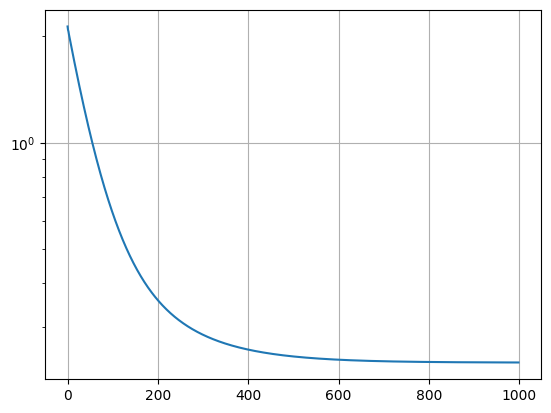

In [40]:
if 0:
    fig, ax = plt.subplots()
    ax.plot(np.arange(MAXITERS), ZZ_gt)
    ax.grid()


ZZ_opt = -np.sum(R) / np.sum(Q)
opt_cost = 0.5 * np.sum(Q) * ZZ_opt**2 + np.sum(R) * ZZ_opt
# print(opt_cost)
# print(cost[-2])
# print(cost_gt[-2])

fig, ax = plt.subplots()
ax.semilogy(np.arange(MAXITERS - 1), np.abs(cost_gt[:-1] - opt_cost))
ax.grid()

plt.show()

In [41]:
grad_norm = np.linalg.norm(gradients_norm, axis=1)

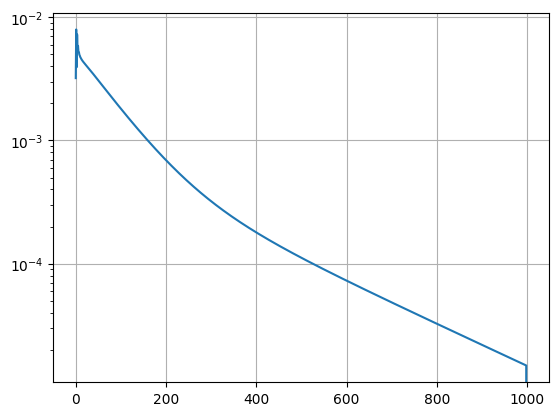

In [42]:
fig, ax = plt.subplots()
ax.semilogy(np.arange(MAXITERS), grad_norm)
ax.grid()

plt.show()

# Task 1.2

In [90]:
# Parameters
M = 100  # Number of points
d = 2    # Dimension of the input space
q = 4

In [91]:
# Step 1: Generate a dataset
X = np.random.randn(M, d)
X

array([[ 1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ],
       [ 0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567],
       [ 0.04575852, -0.18718385],
       [ 1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252],
       [-0.88778575, -1.98079647],
       [-0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985],
       [-0.38732682, -0.30230275],
       [-1.04855297, -1.42001794],
       [-1.70627019,  1.9507754 ],
       [-0.50965218, -0.4380743 ],
       [-1.25279536,  0.77749036],
       [-1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 ],
       [-0.51080514, -1.18063218],
       [-0.02818223,  0.42833187],
       [ 0.06651722,  0.3024719 ],
       [-0.63432209, -0.36274117],
       [-0.67246045, -0.35955316],
       [-0.81314628, -1.7262826 ],
       [ 0.17742614, -0.40178094],
       [-1.63019835,  0.46278226],
       [-0.90729836,  0.0519454 ],
       [ 0.72909056,  0.12898291],
       [ 1.13940068,

In [92]:
# Step 2: Define the nonlinear transformation function phi
def phi(D):
    return np.array([D[0], D[1], D[0]**2, D[1]**2])

In [93]:
# Generate random true weights and bias for labeling
true_w = np.random.randn(q)
true_b = np.random.randn()

print(true_w)
print(true_b)

# Labeling the points
def label_point(phi_x):
    print(np.dot(true_w, phi_x) + true_b)
    return 1 if np.dot(true_w, phi_x) + true_b >= 0 else -1

[-0.01702041  0.37915174  2.25930895 -0.04225715]
-0.955945000492777


In [94]:
# Apply the transformation to the dataset
Phi_X = np.array([phi(x) for x in X])
print(Phi_X)
labels = np.array([label_point(phi_x) for phi_x in Phi_X])

[[ 1.49407907e+00 -2.05158264e-01  2.23227228e+00  4.20899132e-02]
 [ 3.13067702e-01 -8.54095739e-01  9.80113858e-02  7.29479532e-01]
 [-2.55298982e+00  6.53618595e-01  6.51775700e+00  4.27217268e-01]
 [ 8.64436199e-01 -7.42165020e-01  7.47249942e-01  5.50808918e-01]
 [ 2.26975462e+00 -1.45436567e+00  5.15178605e+00  2.11517952e+00]
 [ 4.57585173e-02 -1.87183850e-01  2.09384191e-03  3.50377937e-02]
 [ 1.53277921e+00  1.46935877e+00  2.34941212e+00  2.15901519e+00]
 [ 1.54947426e-01  3.78162520e-01  2.40087047e-02  1.43006891e-01]
 [-8.87785748e-01 -1.98079647e+00  7.88163534e-01  3.92355465e+00]
 [-3.47912149e-01  1.56348969e-01  1.21042864e-01  2.44450001e-02]
 [ 1.23029068e+00  1.20237985e+00  1.51361516e+00  1.44571730e+00]
 [-3.87326817e-01 -3.02302751e-01  1.50022063e-01  9.13869530e-02]
 [-1.04855297e+00 -1.42001794e+00  1.09946332e+00  2.01645094e+00]
 [-1.70627019e+00  1.95077540e+00  2.91135796e+00  3.80552464e+00]
 [-5.09652182e-01 -4.38074302e-01  2.59745346e-01  1.91909094e

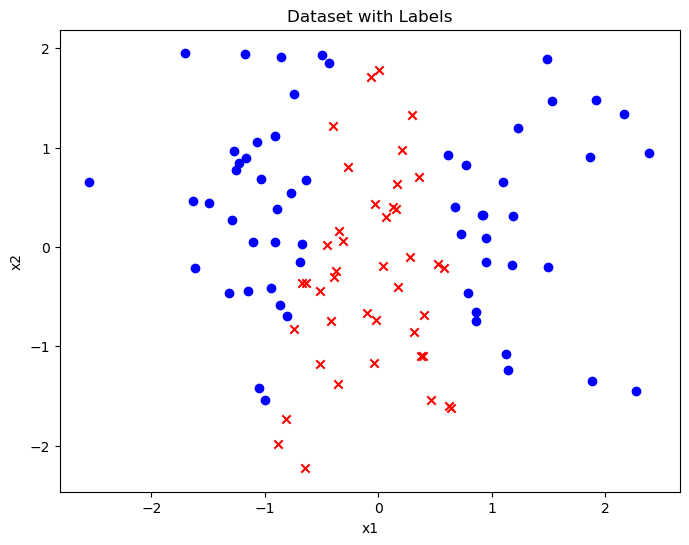

In [95]:
# Visualization of labeled points
plt.figure(figsize=(8, 6))
for i in range(M):
    if labels[i] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='b', marker='o')
    else:
        plt.scatter(X[i, 0], X[i, 1], color='r', marker='x')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Dataset with Labels')
plt.show()

In [96]:
# Step 3: Implement Gradient Descent for Logistic Regression
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [97]:
# Logistic regression cost function
def logistic_cost(w, b, Phi_X, labels):
    m = len(labels)
    total_cost = 0
    for i in range(m):
        z = np.dot(w, Phi_X[i]) + b
        total_cost += np.log(1 + np.exp(-labels[i] * z))
        print(total_cost)
    return total_cost / m

In [98]:
# Gradient of the cost function
def compute_gradients(w, b, Phi_X, labels):
    m = len(labels)
    dw = np.zeros_like(w)
    db = 0
    for i in range(m):
        z = np.dot(w, Phi_X[i]) + b
        p = sigmoid(z)
        dw += (p - (labels[i] == 1)) * Phi_X[i]
        db += (p - (labels[i] == 1))
    return dw / m, db / m

In [99]:
# Gradient Descent Algorithm
def gradient_descent(Phi_X, labels, alpha, num_iterations):
    w = np.random.randn(q)
    b = np.random.randn()
    costs = []
    gradient_norms = []

    for i in range(num_iterations):
        dw, db = compute_gradients(w, b, Phi_X, labels)
        w -= alpha * dw
        b -= alpha * db

        cost = logistic_cost(w, b, Phi_X, labels)
        gradient_norm = np.linalg.norm(dw) + np.abs(db)
        costs.append(cost)
        gradient_norms.append(gradient_norm)
        
        if i % 10 == 0:  # Print cost every 10 iterations
            print(f"Iteration {i}: Cost = {cost:.4f}, Gradient norm = {gradient_norm:.4f}")

    return w, b, costs, gradient_norms

In [100]:
# Parameters for gradient descent
alpha = 0.1
num_iterations = 200

# Run gradient descent
w, b, costs, gradient_norms = gradient_descent(Phi_X, labels, alpha, num_iterations)


0.3736431429101622
0.7820406566534521
0.8120983399717981
1.6712658015441693
2.6270479246371465
3.3716148719232035
6.484792894435422
7.023784383342337
7.038771078430379
7.8158634984296995
10.142339233556068
10.992447585827366
12.585554683189
16.94455345900235
17.800057284960324
18.446198323421775
18.56797164016836
19.072974570456076
19.343697333703783
19.86912095027917
20.46442545336152
21.424381767723943
22.410148191669247
22.459402879118002
23.141034764491426
23.337670361854702
23.707697720043726
24.382178860246352
25.961968413693032
26.4889553493295
26.94897218736483
27.753955676481773
28.673263994893105
28.731583200021966
34.19705162164269
34.68869556955359
36.055333152281854
36.136597641559234
36.286423462349546
36.59210570339167
36.59625723807358
37.12161771984345
38.287820047603496
39.237515388897776
44.541244381119355
45.14383150245458
47.757306548071796
48.625575131884425
54.16323433151344
54.449396758615464
55.01555844088258
56.80280691231741
57.045612906791966
57.085998662146

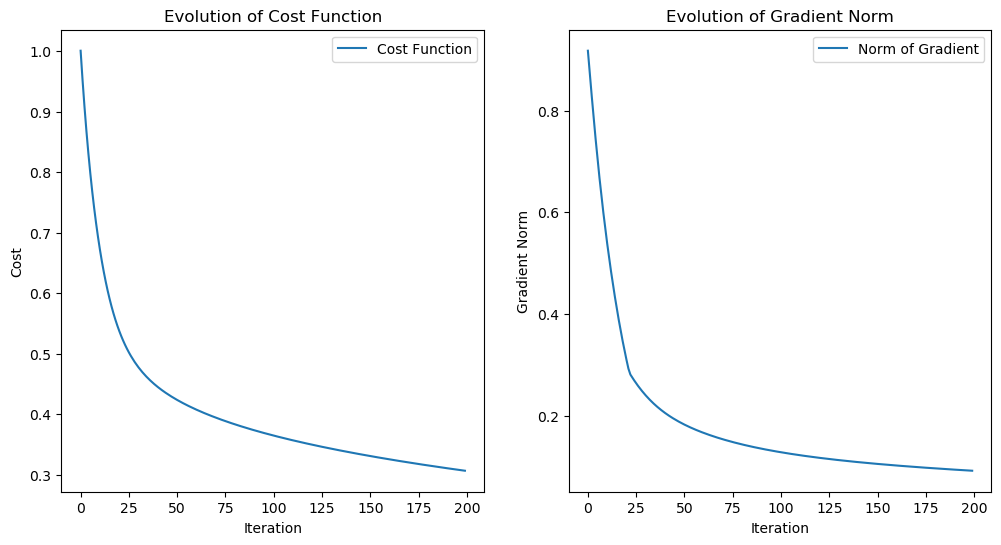

In [101]:
# Step 4: Plot results
def plot_results(costs, gradient_norms):
    iterations = len(costs)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(iterations), costs, label='Cost Function')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Evolution of Cost Function')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(iterations), gradient_norms, label='Norm of Gradient')
    plt.xlabel('Iteration')
    plt.ylabel('Gradient Norm')
    plt.title('Evolution of Gradient Norm')
    plt.legend()

    plt.show()

plot_results(costs, gradient_norms)

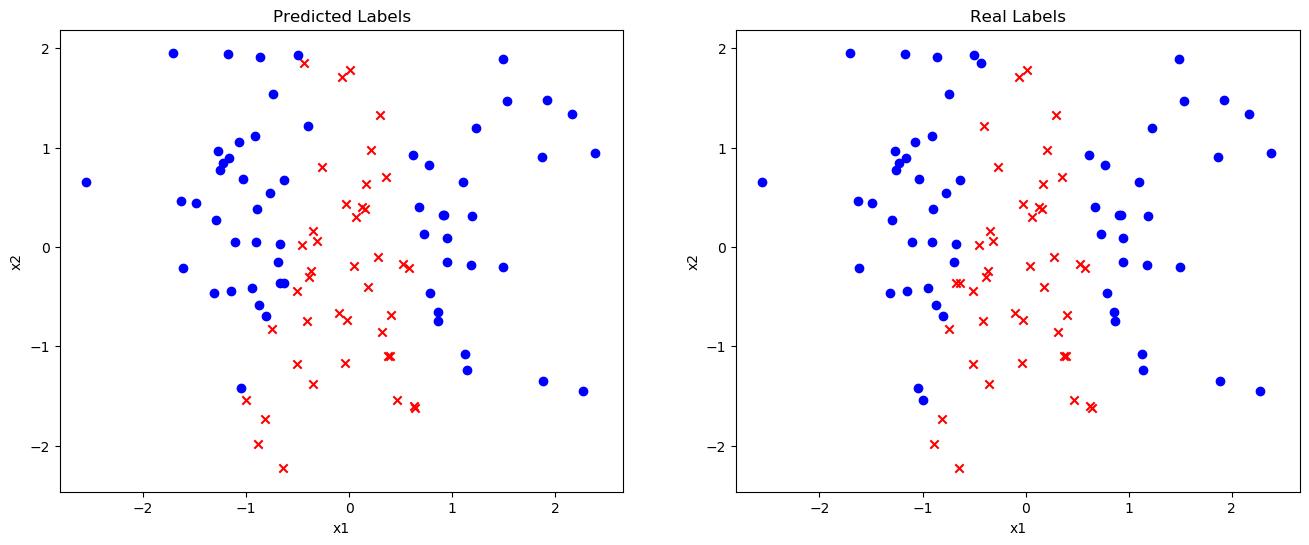

In [102]:
# I plot the predicted labels in one plot and the real ones in another one
# Predicted labels
predicted_labels = np.array([1 if np.dot(w, phi_x) + b >= 0 else -1 for phi_x in Phi_X])

# Visualization of predicted labels
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for i in range(M):
    if predicted_labels[i] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='b', marker='o')
    else:
        plt.scatter(X[i, 0], X[i, 1], color='r', marker='x')
    
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Predicted Labels')

# Real labels
plt.subplot(1, 2, 2)
for i in range(M):
    if labels[i] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='b', marker='o')
    else:
        plt.scatter(X[i, 0], X[i, 1], color='r', marker='x')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Real Labels')
plt.show()

# Task 1.3

In [103]:
# Parameters
M = 100  # Number of points
d = 2    # Dimension of the input space
q = 4

In [104]:
# Step 1: Generate a dataset
X = np.random.randn(M, d)

In [105]:
# Step 2: Define the nonlinear transformation function phi
def phi(D):
    return np.array([D[0], D[1], D[0]**2, D[1]**2])

In [106]:
# Generate random true weights and bias for labeling
true_w = np.random.randn(q)
true_b = np.random.randn()

print(true_w)
print(true_b)

# Labeling the points
def label_point(phi_x):
    return 1 if np.dot(true_w, phi_x) + true_b >= 0 else -1

[ 0.94304609 -2.73967717 -0.56931205  0.26990435]
-0.4668455460527625


In [107]:
# Apply the transformation to the dataset
Phi_X = np.array([phi(x) for x in X])

labels = np.array([label_point(phi_x) for phi_x in Phi_X])

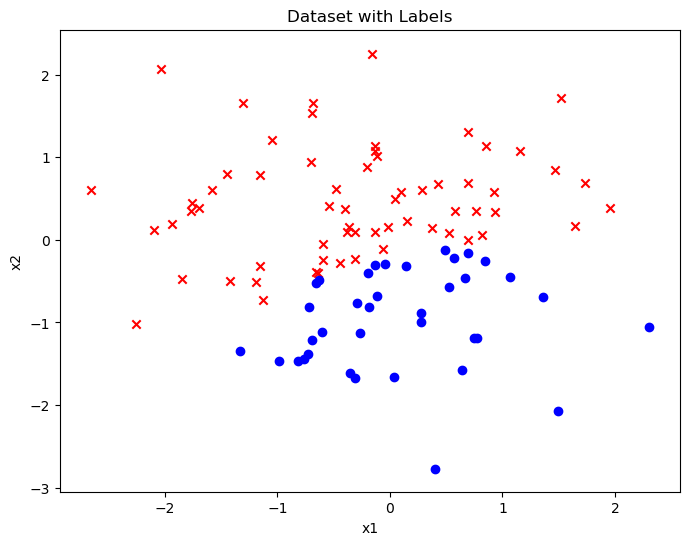

In [108]:
# Visualization of labeled points
plt.figure(figsize=(8, 6))
for i in range(M):
    if labels[i] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='b', marker='o')
    else:
        plt.scatter(X[i, 0], X[i, 1], color='r', marker='x')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Dataset with Labels')
plt.show()

In [109]:
NN = 10

Phi_X_n = np.array_split(Phi_X, NN)
labels_n = np.array_split(labels, NN)

#G = nx.path_graph(NN)
#G = nx.star_graph(NN-1)
G = nx.cycle_graph(NN)

I_NN = np.eye(NN)

Adj = nx.adjacency_matrix(G)
Adj = Adj.toarray()

In [110]:
AA = np.zeros(shape=(NN, NN))

for ii in range(NN):
    N_ii = np.nonzero(Adj[ii])[0]
    deg_ii = len(N_ii)
    for jj in N_ii:
        deg_jj = len(np.nonzero(Adj[jj])[0])
        AA[ii, jj] = 1 / (1 + max([deg_ii, deg_jj]))

AA += I_NN - np.diag(np.sum(AA, axis=0))

if 0:
    print(np.sum(AA, axis=0))
    print(np.sum(AA, axis=1))

In [111]:
def fn(z, Phi_X, labels):
    w = z[:-1]
    b = z[-1]
    m = len(labels)
    dw = np.zeros_like(w)
    db = 0
    for i in range(m):
        z = np.dot(w, Phi_X[i]) + b
        p = sigmoid(z)
        dw += (p - (labels[i] == 1)) * Phi_X[i]
        db += (p - (labels[i] == 1))
    total_cost = 0
    for i in range(m):
        z = np.dot(w, Phi_X[i]) + b
        total_cost += np.log(1 + np.exp(-labels[i] * z))
    return total_cost / m, dw, db


W = np.random.randn(NN, q)
B = np.random.uniform(size=(NN))


In [112]:
MAXITERS = 1000
dd = 5

ZZ_gt = np.zeros((MAXITERS, NN, dd))
SS_gt = np.zeros((MAXITERS, NN, dd))
for ii in range(NN):
    _, SS_gt[0, ii, :-1], SS_gt[0, ii, -1] = fn(ZZ_gt[0, ii], Phi_X_n[ii], labels_n[ii])

cost_gt = np.zeros((MAXITERS))
gradients_norm = np.zeros((MAXITERS))
alpha = 1e-2

In [113]:
grad_ell_ii_new = np.zeros(dd)
grad_ell_ii_old = np.zeros(dd)

for kk in range(MAXITERS - 1):

    # gradient tracking
    for ii in range(NN):
        N_ii = np.nonzero(Adj[ii])[0]

        ZZ_gt[kk + 1, ii] += AA[ii, ii] * ZZ_gt[kk, ii]
        SS_gt[kk + 1, ii] += AA[ii, ii] * SS_gt[kk, ii]
        for jj in N_ii:
            ZZ_gt[kk + 1, ii] += AA[ii, jj] * ZZ_gt[kk, jj]
            SS_gt[kk + 1, ii] += AA[ii, jj] * SS_gt[kk, jj]

        ZZ_gt[kk + 1, ii] -= alpha * SS_gt[kk, ii]

        # print(Q[ii])
        _, grad_ell_ii_new[:-1], grad_ell_ii_new[-1] = fn(ZZ_gt[kk + 1, ii], Phi_X_n[ii], labels_n[ii])
        _, grad_ell_ii_old[:-1], grad_ell_ii_old[-1] = fn(ZZ_gt[kk, ii], Phi_X_n[ii], labels_n[ii])
        SS_gt[kk + 1, ii] += grad_ell_ii_new - grad_ell_ii_old

        gradient_norm = np.linalg.norm(grad_ell_ii_new - grad_ell_ii_old)
        gradients_norm[kk] = gradient_norm

        ell_ii_gt, _, _ = fn(ZZ_gt[kk, ii], Phi_X_n[ii], labels_n[ii])
        cost_gt[kk] += ell_ii_gt

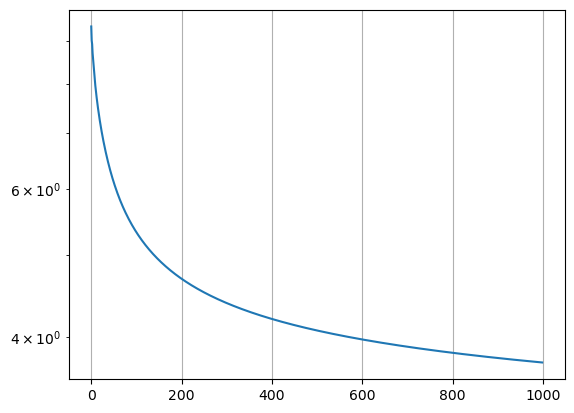

In [114]:
if 0:
    fig, ax = plt.subplots()
    ax.plot(np.arange(MAXITERS), ZZ_gt)
    ax.grid()


ZZ_opt = -np.sum(R) / np.sum(Q)
opt_cost = 0.5 * np.sum(Q) * ZZ_opt**2 + np.sum(R) * ZZ_opt
# print(opt_cost)
# print(cost[-2])
# print(cost_gt[-2])

fig, ax = plt.subplots()
ax.semilogy(np.arange(MAXITERS - 1), np.abs(cost_gt[:-1] - opt_cost))
ax.grid()

plt.show()

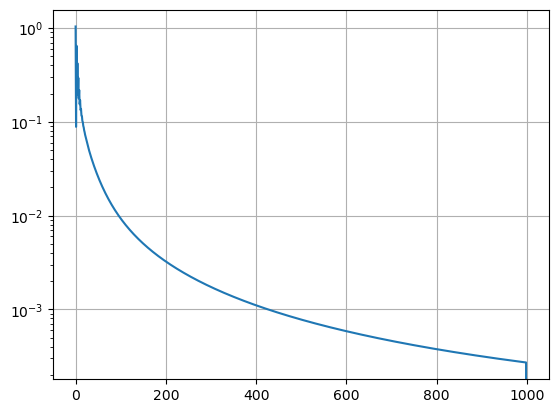

In [115]:
fig, ax = plt.subplots()
ax.semilogy(np.arange(MAXITERS), gradients_norm)
ax.grid()

plt.show()

In [116]:
print(ZZ_gt[kk])
res = np.mean(ZZ_gt[kk], axis=0)
print(res)
w = res[:-1]
b = res[-1]
print(w)
print(b)

[[ 1.67049722 -4.58201797 -1.16544269  1.01545718 -1.04784062]
 [ 1.67045717 -4.58201403 -1.16549112  1.01545061 -1.04785918]
 [ 1.67042497 -4.58200068 -1.16556343  1.01543435 -1.04789873]
 [ 1.67040624 -4.58198311 -1.16563218  1.01541312 -1.0479475 ]
 [ 1.67041164 -4.58197312 -1.16565983  1.01539836 -1.04797944]
 [ 1.67043713 -4.58197121 -1.16564616  1.01539696 -1.0479852 ]
 [ 1.67047588 -4.58197458 -1.16559546  1.01540578 -1.04796655]
 [ 1.6705139  -4.58198298 -1.16552663  1.01542047 -1.0479365 ]
 [ 1.67053834 -4.58199477 -1.16546386  1.0154367  -1.04789449]
 [ 1.67053112 -4.58200921 -1.16543301  1.01545125 -1.0478552 ]]
[ 1.67046936 -4.58199217 -1.16554544  1.01542648 -1.04791634]
[ 1.67046936 -4.58199217 -1.16554544  1.01542648]
-1.0479163408251875


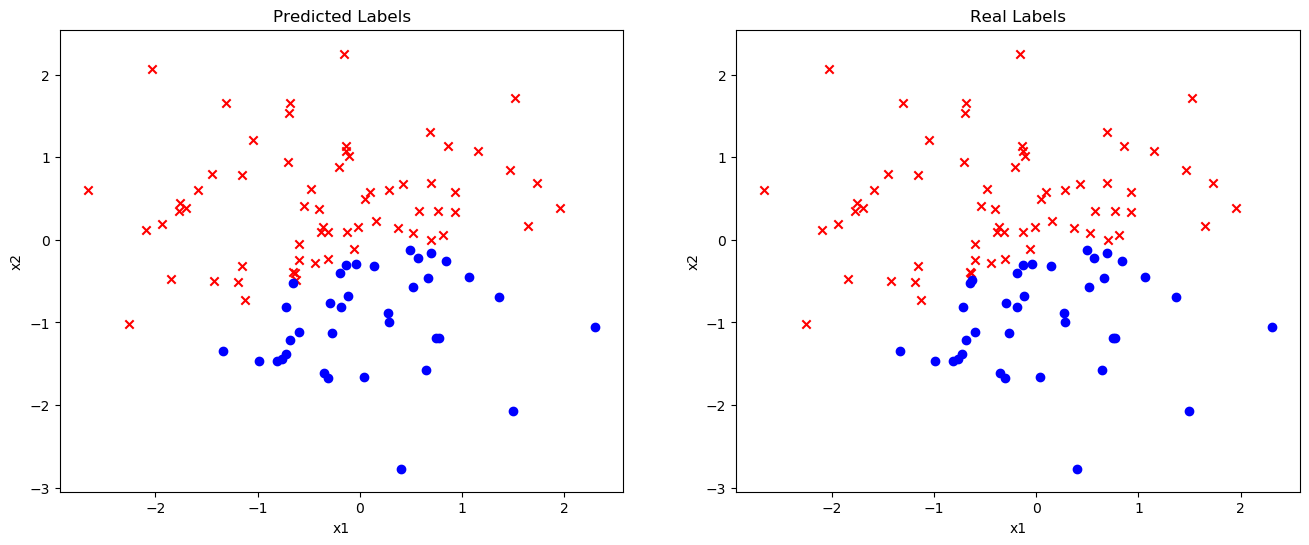

In [117]:
# I plot the predicted labels in one plot and the real ones in another one
# Predicted labels
predicted_labels = np.array([1 if np.dot(w, phi_x) + b >= 0 else -1 for phi_x in Phi_X])

# Visualization of predicted labels
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for i in range(M):
    if predicted_labels[i] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='b', marker='o')
    else:
        plt.scatter(X[i, 0], X[i, 1], color='r', marker='x')
    
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Predicted Labels')

# Real labels
plt.subplot(1, 2, 2)
for i in range(M):
    if labels[i] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='b', marker='o')
    else:
        plt.scatter(X[i, 0], X[i, 1], color='r', marker='x')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Real Labels')
plt.show()